In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
data = pd.read_csv(r'D:\Data Science\Project1\First\Dataset\SMSSpamCollection.csv', names=["labels","message"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   labels   5574 non-null   object
 1   message  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [22]:
data.drop_duplicates('message', inplace=True)

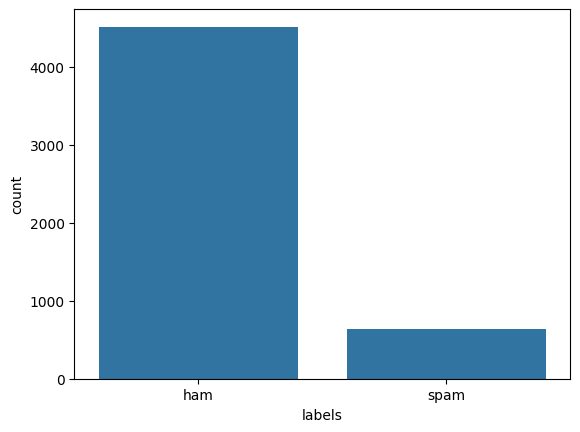

In [23]:
sns.countplot(data=data, x='labels')
plt.show()

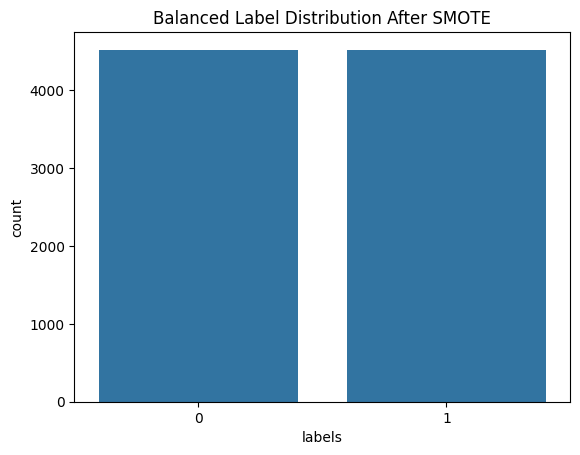

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

cnv = TfidfVectorizer()
x = cnv.fit_transform(data['message'])
y = data['labels'].map({'ham':0, 'spam':1})

sm = SMOTE()
x_sam,y_sam = sm.fit_resample(x,y)

sns.countplot(data=pd.DataFrame(y_sam), x='labels')
plt.title("Balanced Label Distribution After SMOTE")
plt.show()

In [33]:
x_tr,x_te,y_tr,y_te = train_test_split(x_sam,y_sam,random_state=42, test_size=0.2)

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_tr,y_tr)
ypred = model.predict(x_te)

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_te, ypred))
print(confusion_matrix(y_te,ypred))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       889
           1       0.99      0.98      0.99       919

    accuracy                           0.99      1808
   macro avg       0.99      0.99      0.99      1808
weighted avg       0.99      0.99      0.99      1808

[[880   9]
 [ 15 904]]
